# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("dataset.csv")
original_df = dataframe.copy()
dataframe.isnull().sum()
# there is no null data 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
dataframe.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
dataframe.apply(lambda col: col.unique())

age         [19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2...
sex                                            [female, male]
bmi         [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...
children                                   [0, 1, 3, 2, 5, 4]
smoker                                              [yes, no]
region           [southwest, southeast, northwest, northeast]
charges     [16884.924, 1725.5523, 4449.462, 21984.47061, ...
dtype: object

#### [sex, smoker] variables are nominal binary variables. They should be set as 0 or 1.
#### [region] variable is nominal variable and it has 4 different value. Dummy variables should be created.
#### All variables should be standarization.

In [6]:
dataframe.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Set the Binary Variables


In [7]:
dataframe["sex"].replace({"female":0, "male":1}, inplace=True)
dataframe["smoker"].replace({"no":0, "yes":1}, inplace=True)

In [8]:
dataframe.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


## Create Dummy Variable for Ordinal Variables
### After creating part, region column should be removed.

In [9]:
def create_dummies(df, column_list):
    for column in column_list:
        dummies = pd.get_dummies(df[column],prefix=column)
        df = pd.concat([df, dummies], axis=1)
    
    return df

In [10]:
dummy_var_list = ["region"]
dataframe = create_dummies(dataframe, dummy_var_list)

In [11]:
dataframe.head(10)

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
5,31,0,25.740,0,0,southeast,3756.62160,0,0,1,0
6,46,0,33.440,1,0,southeast,8240.58960,0,0,1,0
7,37,0,27.740,3,0,northwest,7281.50560,0,1,0,0
8,37,1,29.830,2,0,northeast,6406.41070,1,0,0,0
9,60,0,25.840,0,0,northwest,28923.13692,0,1,0,0


In [12]:
dataframe.drop(dummy_var_list, axis=1, inplace=True)

In [13]:
dataframe.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


## Standartization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(dataframe)
scaled_array

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [15]:
df_scaled = pd.DataFrame(scaled_array,columns=dataframe.columns)
df_scaled.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,0.298584,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.953689,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.728675,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.719843,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.776802,-0.565267,1.765481,-0.611324,-0.566418
5,-0.584350,-1.010519,-0.807656,-0.908614,-0.507463,-0.785908,-0.565267,-0.566418,1.635795,-0.566418
6,0.483668,-1.010519,0.455486,-0.078767,-0.507463,-0.415500,-0.565267,-0.566418,1.635795,-0.566418
7,-0.157143,-1.010519,-0.479567,1.580926,-0.507463,-0.494728,-0.565267,1.765481,-0.611324,-0.566418
8,-0.157143,0.989591,-0.136714,0.751079,-0.507463,-0.567017,1.769076,-0.566418,-0.611324,-0.566418
9,1.480485,-1.010519,-0.791252,-0.908614,-0.507463,1.293027,-0.565267,1.765481,-0.611324,-0.566418


# Visualization, Explore The Data

<AxesSubplot:>

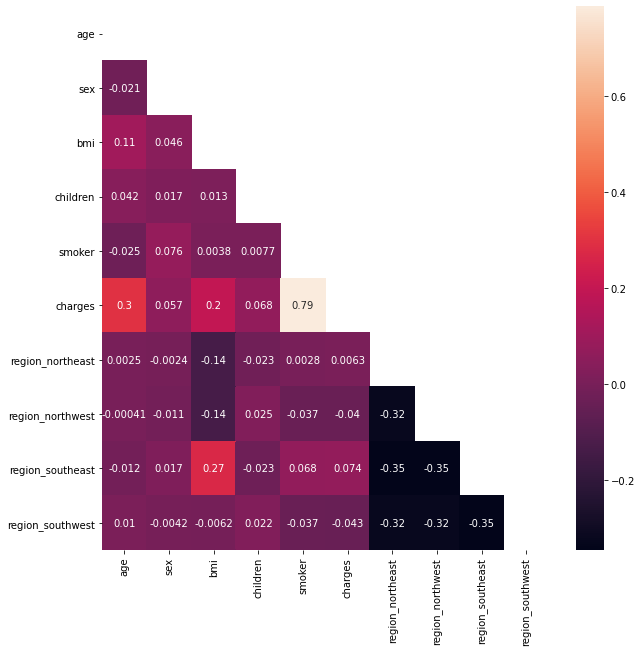

In [16]:
plt.figure(figsize=(10,10))

corr = dataframe.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot = True)

# Smoker and charges variables are highly correlated. Smoking is causes more money to be spent.
# bmi and charges variables are correlated and it increases togeher.
# Older people has more charge variables than younger ones.
# BMI for People in Northeast and nortwest is negatively correleated.
# BMI for people in southeast is positively correleated and they have more BMI value.


Text(0.5, 1.0, 'Age-Charge')

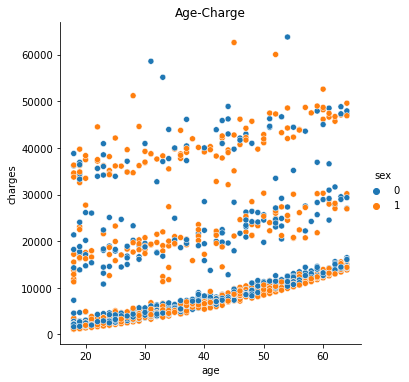

In [17]:
sns.relplot(x="age", y="charges", hue="sex", kind="scatter", data=dataframe)
plt.title("Age-Charge")

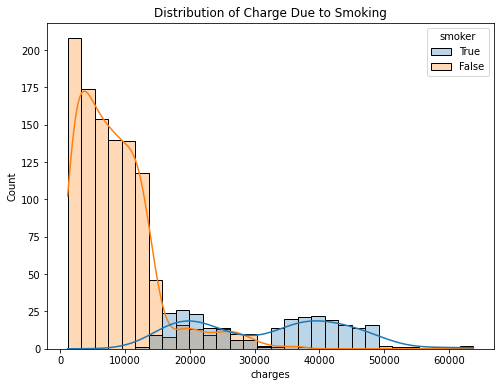

In [18]:
plt.figure(figsize=(8,6))

sns.histplot(x=dataframe["charges"], hue=dataframe["smoker"], kde=True, hue_order=[True, False], alpha=0.3)
plt.title("Distribution of Charge Due to Smoking")
plt.show()

# Non smokers spend less money than smokers. After value for charges at 30000, nearly no smoker at that part.
# Non smokers distribued as a right skewed.
# Smokers distributed as bimodal.


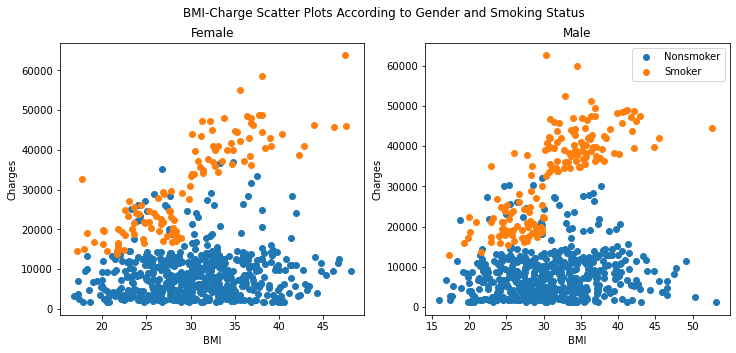

In [19]:
female_nonsmoker = dataframe[(dataframe["sex"]==0) & (dataframe["smoker"]==0)]
female_smoker = dataframe[(dataframe["sex"]==0) & (dataframe["smoker"]==1)]

male_nonsmoker = dataframe[(dataframe["sex"]==1) & (dataframe["smoker"]==0)]
male_smoker = dataframe[(dataframe["sex"]==1) & (dataframe["smoker"]==1)]

fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('BMI-Charge Scatter Plots According to Gender and Smoking Status')

axs[0].scatter(female_nonsmoker["bmi"], female_nonsmoker["charges"], label="Nonsmoker")
axs[0].scatter(female_smoker["bmi"], female_smoker["charges"], label="Smoker")
axs[0].set_title("Female")
axs[0].set_xlabel("BMI")
axs[0].set_ylabel("Charges")

axs[1].scatter(male_nonsmoker["bmi"], male_nonsmoker["charges"], label="Nonsmoker")
axs[1].scatter(male_smoker["bmi"], male_smoker["charges"], label="Smoker")
axs[1].set_title("Male")
axs[1].set_xlabel("BMI")
axs[1].set_ylabel("Charges")

plt.legend()
plt.show()

# For both genders, smokers spends more money than nonsmokers. 
# Also for smokers, the higher BMI value the higher charge value. There is positive correlation between BMI-Smoking status.

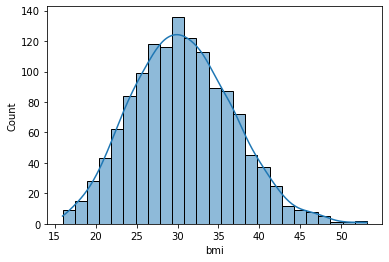

In [20]:
sns.histplot(x=dataframe["bmi"], stat="count", kde=True)

plt.show()
# bmi is distributed as normally.

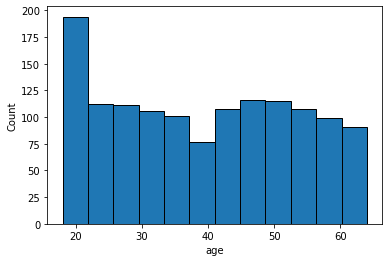

In [21]:
age_data = dataframe["age"].to_numpy()

plt.xlabel("age")
plt.ylabel("Count")

plt.hist(age_data, bins=12, edgecolor="black")
plt.show()
# Young people are more than others.

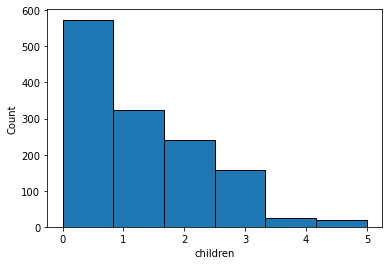

In [22]:
children_data = dataframe["children"].to_numpy()

plt.xlabel("children")
plt.ylabel("Count")

plt.hist(children_data, bins=6, edgecolor="black")
plt.show()
# As a normally, having 0-1 kids are common. This is right skewed distribution.

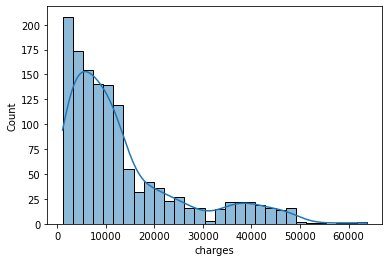

In [23]:
sns.histplot(x=dataframe["charges"], stat="count", kde=True)
plt.show()

# It is right skewed. Few people spend a lot of money for health

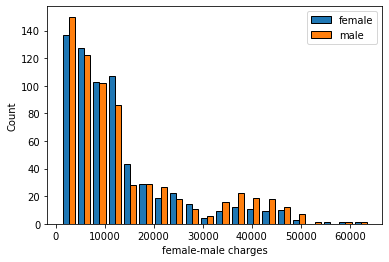

In [24]:
female_charges_data = dataframe.loc[dataframe["sex"]==0,"charges"].to_numpy()
male_charges_data = dataframe.loc[dataframe["sex"]==1,"charges"].to_numpy()


plt.hist([female_charges_data, male_charges_data], bins=20, edgecolor="black", label=["female", "male"])

#plt.hist(female_charges_data, bins=20, edgecolor="black", color="green", label="female", alpha=0.4)
#plt.hist(male_charges_data, bins=20, edgecolor="black", color="blue", label="male", alpha=0.4)

plt.legend(loc="upper right")
plt.xlabel("female-male charges")
plt.ylabel("Count")

plt.show()

# As we see, both genders almost equal distribution the charge ranges between 0-20000. 
# However, more males spends money than females in the range after 30000.
# Both genders distributed as right skewed.

## KMeans


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
models = []

for k in range(1,21):
    KMeanModel = KMeans(n_clusters=k)
    KMeanModel = KMeanModel.fit(scaled_array)
    models.append(KMeanModel)
    
    inertias.append(KMeanModel.inertia_)

        

## Elbow Method

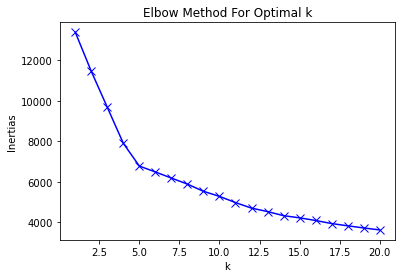

In [26]:
plt.plot(list(range(1,21)), inertias, marker="x", color="blue", markersize=8)
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('Elbow Method For Optimal k')
plt.show()

# The k should be 5 for this elbow plot.

In [27]:
for i in range(1,20):
    print(models[i])
    print("Silhouette score:",silhouette_score(scaled_array, models[i].predict(scaled_array), metric="euclidean"))
    print("**************************************")
# The k should be  for silhouette score. K=6 may be better choice also. The scores are really close and we find k=5 in elbow method

KMeans(n_clusters=2)
Silhouette score: 0.16560369850327253
**************************************
KMeans(n_clusters=3)
Silhouette score: 0.2281925229969534
**************************************
KMeans(n_clusters=4)
Silhouette score: 0.3033968739488372
**************************************
KMeans(n_clusters=5)
Silhouette score: 0.30686531605135453
**************************************
KMeans(n_clusters=6)
Silhouette score: 0.27108491934613177
**************************************
KMeans(n_clusters=7)
Silhouette score: 0.254292530730951
**************************************
KMeans()
Silhouette score: 0.2557018671672072
**************************************
KMeans(n_clusters=9)
Silhouette score: 0.2619861380121415
**************************************
KMeans(n_clusters=10)
Silhouette score: 0.23125902017043531
**************************************
KMeans(n_clusters=11)
Silhouette score: 0.24953711990271185
**************************************
KMeans(n_clusters=12)
Silhouette sco

## Silhouette Plot

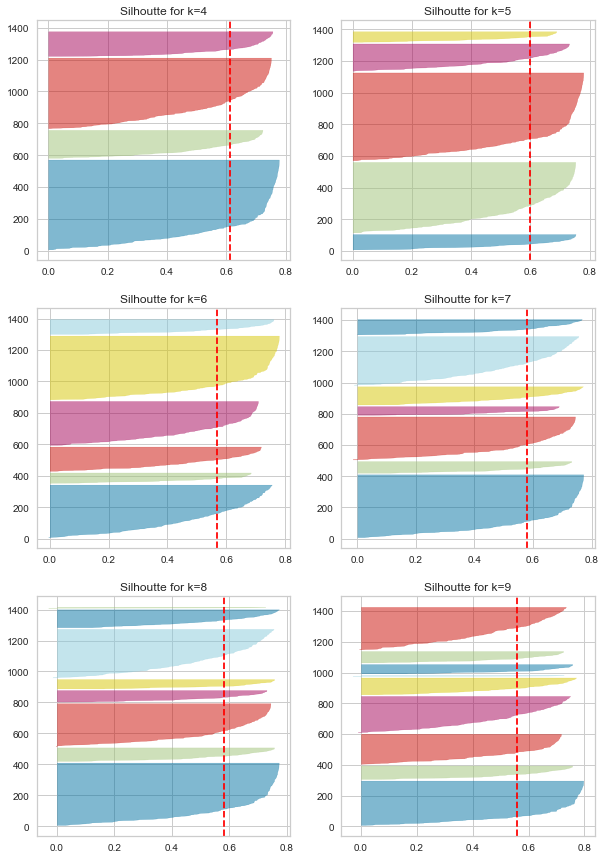

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(10,15))

for i in [4,5,6,7,8,9]:

    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[(i//2)-2][i%2])
    ax[(i//2)-2][i%2].set_title(f"Silhoutte for k={i}")
    visualizer.fit(dataframe)
    

# All of this, the best K may be 6-7-8. I want to choose k=7 because fluctuations between clusters are minimal rather than k=4,5,6,8

## KMeans on Selected Features

In [29]:
df_age_charge = dataframe[["age", "charges"]]
df_age_charge
#

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


In [30]:
scaler = StandardScaler()
scaled_arr_age_charge = scaler.fit_transform(df_age_charge)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


KMeanModel = KMeans(n_clusters=7 )
KMeanModel = KMeanModel.fit(scaled_arr_age_charge)
dataframe["cluster"] = KMeanModel.labels_

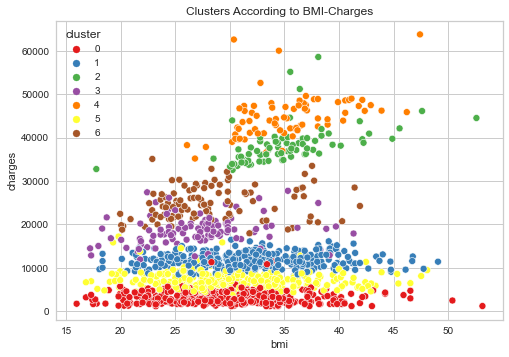

In [32]:
pal = sns.color_palette('Set1')

sns.scatterplot(data=dataframe, x='bmi', y='charges', hue='cluster', palette=pal[0:7])
plt.title('Clusters According to BMI-Charges')
plt.show()

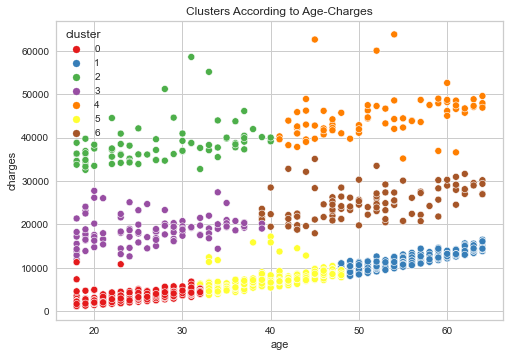

In [33]:
pal = sns.color_palette('Set1')

sns.scatterplot(data=dataframe, x='age', y='charges', hue='cluster', palette=pal[0:7])
plt.title('Clusters According to Age-Charges')
plt.show()

# Agglomerative Clustering

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

In [35]:
# Firstly, I should normalize data then modelling.
normalized_array = normalize(scaled_array)

pca = PCA(n_components = 10)
x_principal = pca.fit_transform(normalized_array)
x_principal = pd.DataFrame(x_principal)

x_principal.columns = df_scaled.columns

x_principal

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.036712,-0.263232,-0.366673,0.269280,-0.035419,0.819668,-0.180127,-0.160118,-0.174299,2.261430e-17
1,0.487638,-0.229851,0.322420,-0.540023,-0.516635,0.073517,0.119840,-0.071761,0.002769,1.457358e-16
2,0.504638,-0.151529,0.283539,-0.300294,-0.379591,-0.131697,0.612878,0.073058,-0.018156,2.301686e-16
3,-0.475080,0.145228,0.508588,0.240077,-0.341499,0.110069,-0.326351,0.224605,0.382378,2.522382e-16
4,-0.512564,-0.066014,0.639646,-0.016589,-0.397362,-0.096716,-0.341691,-0.047736,-0.016282,-2.831546e-18
...,...,...,...,...,...,...,...,...,...,...
1333,-0.332274,0.068538,0.525583,0.408639,-0.126586,-0.495550,0.411135,0.046451,-0.029538,6.168796e-17
1334,-0.286382,0.233313,-0.243384,-0.727394,0.080570,0.249080,-0.117424,-0.403395,-0.003639,-1.964309e-17
1335,0.472757,-0.281033,0.290200,-0.627463,0.091516,0.293534,-0.118193,-0.289835,-0.014081,-8.940742e-17
1336,-0.331166,-0.666007,-0.308975,-0.242902,0.044047,0.474876,-0.160768,0.000652,0.032890,2.075838e-17


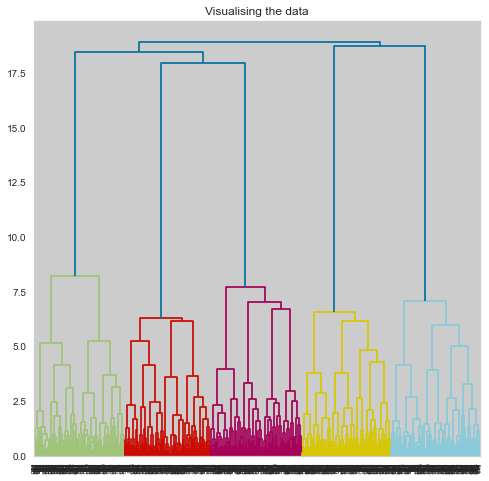

In [36]:

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x_principal, method ='ward')))

In [37]:
silhouette_score_list = []
for k in range(2,21):
    ac = AgglomerativeClustering(n_clusters = k)
    score = silhouette_score(x_principal, ac.fit_predict(x_principal), metric="euclidean")
    silhouette_score_list.append(score)
    
    print(f"Silhouette score for k={k}:", score )
    print("**************************************")



Silhouette score for k=2: 0.14917875127797228
**************************************
Silhouette score for k=3: 0.20962881674967798
**************************************
Silhouette score for k=4: 0.26464351583401496
**************************************
Silhouette score for k=5: 0.32300613668369094
**************************************
Silhouette score for k=6: 0.28732646565013503
**************************************
Silhouette score for k=7: 0.29391516412191376
**************************************
Silhouette score for k=8: 0.2615298639111307
**************************************
Silhouette score for k=9: 0.26119310767241777
**************************************
Silhouette score for k=10: 0.26301390550343645
**************************************
Silhouette score for k=11: 0.2459315386318693
**************************************
Silhouette score for k=12: 0.23545436593776656
**************************************
Silhouette score for k=13: 0.23945045355842112
*****************

Text(0, 0.5, 'Silhouette Score')

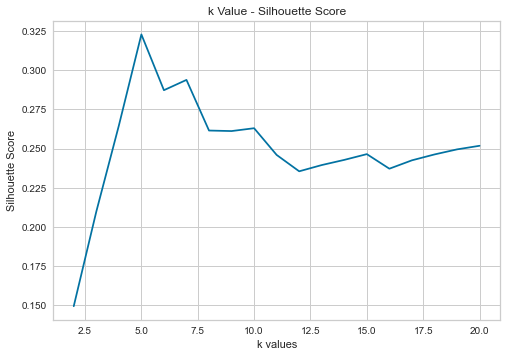

In [38]:
plt.plot(list(range(2,21)), silhouette_score_list)

plt.title("k Value - Silhouette Score")
plt.xlabel("k values")
plt.ylabel("Silhouette Score")

# The maximum Silhouette score is seen at k=5. So k=5 should be chosen according to Agglomerative Clustering.

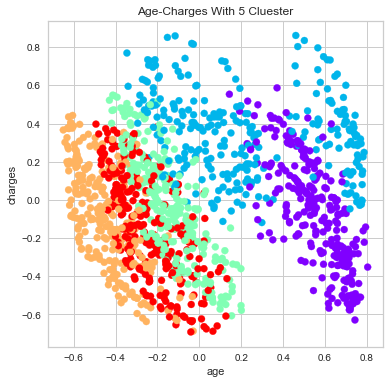

In [39]:

ac = AgglomerativeClustering(n_clusters = 5)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(x_principal["age"], x_principal["charges"], c = ac.fit_predict(x_principal), cmap ='rainbow')


plt.xlabel("age")
plt.ylabel("charges")
plt.title("Age-Charges With 5 Cluester")
plt.show()

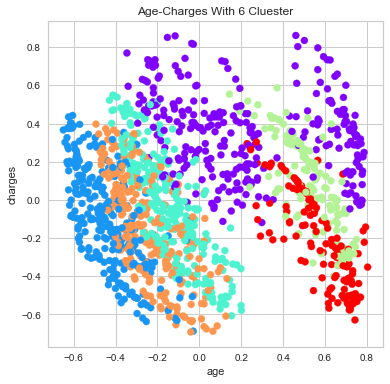

In [40]:

ac = AgglomerativeClustering(n_clusters = 6)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(x_principal["age"], x_principal["charges"], c = ac.fit_predict(x_principal), cmap ='rainbow')


plt.xlabel("age")
plt.ylabel("charges")
plt.title("Age-Charges With 6 Cluester")
plt.show()

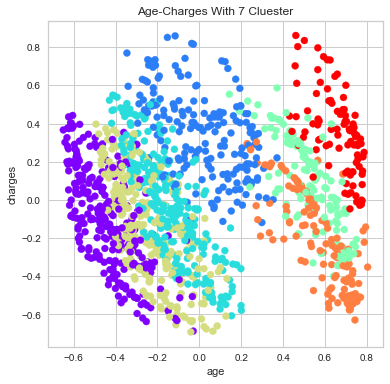

In [41]:
ac = AgglomerativeClustering(n_clusters = 7)
 
# Visualizing the clustering

plt.figure(figsize =(6, 6))
plt.scatter(x_principal["age"], x_principal["charges"], c = ac.fit_predict(x_principal), cmap ='rainbow')

plt.xlabel("age")
plt.ylabel("charges")
plt.title("Age-Charges With 7 Cluester")

plt.show()